In [8]:
import librosa

# File path of the audio
audio_file = "BWR.wav"

# Load the audio file
audio_data, sampling_rate = librosa.load(audio_file, sr=None)

# Print information about the audio
print("Audio data shape:", audio_data.shape)
print("Sampling rate:", sampling_rate)


Audio data shape: (207872,)
Sampling rate: 48000


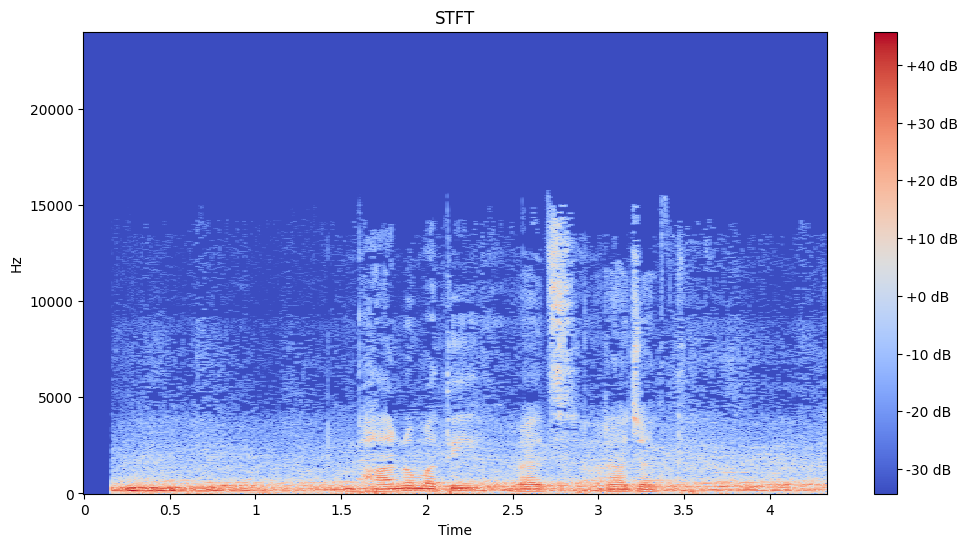

In [9]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Compute STFT
stft = librosa.stft(audio_data)

# Convert amplitude to dB
stft_db = librosa.amplitude_to_db(np.abs(stft))

# Plot STFT
plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()


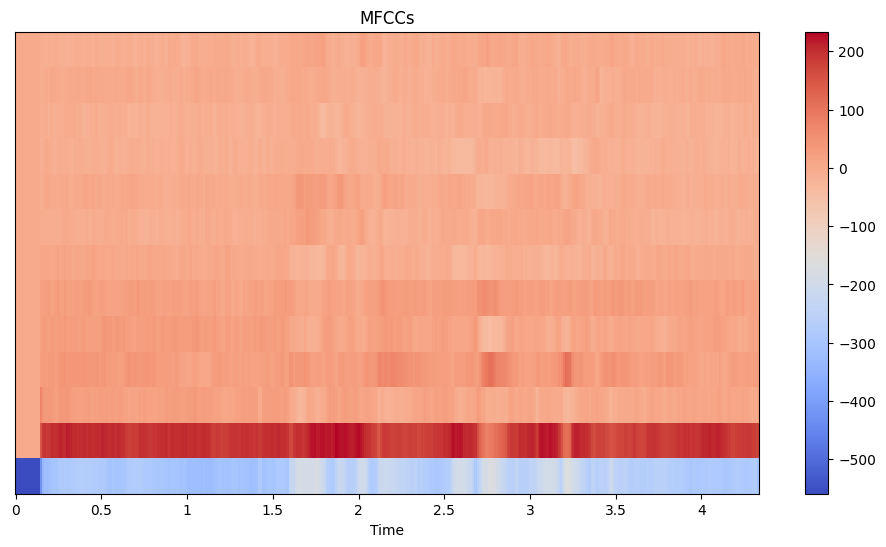

In [10]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()


In [11]:
import numpy as np
import librosa
import IPython.display as ipd

# Load the audio file
audio_file = "BWR.wav"
audio_data, sampling_rate = librosa.load(audio_file, sr=None)

def play_audio_segment(start_time, end_time):
    """
    Play a segment of audio specified by start_time and end_time.
    """
    start_sample = int(start_time * sampling_rate)
    end_sample = int(end_time * sampling_rate)
    segment = audio_data[start_sample:end_sample]
    ipd.display(ipd.Audio(segment, rate=sampling_rate))

# Function to segment the audio based on provided ranges
def segment_audio(ranges):
    """
    Segment the audio based on the provided ranges.
    ranges is a list of tuples (start_time, end_time).
    """
    for i, (start_time, end_time) in enumerate(ranges):
        print(f"Segment {i + 1}:")
        print(f"Start time: {start_time:.2f}s, End time: {end_time:.2f}s")
        print("Playing audio segment...")
        play_audio_segment(start_time, end_time)
        print("")

# Example: Manually specified ranges
ranges = [(1.5, 2.5), (2.5, 3), (3.0, 3.6)]  # Example ranges (adjust as needed)
segment_audio(ranges)


Segment 1:
Start time: 1.50s, End time: 2.50s
Playing audio segment...



Segment 2:
Start time: 2.50s, End time: 3.00s
Playing audio segment...



Segment 3:
Start time: 3.00s, End time: 3.60s
Playing audio segment...


In [12]:
import numpy as np
import librosa
import IPython.display as ipd

# Load the audio file
audio_file = "BWR.wav"
audio_data, sampling_rate = librosa.load(audio_file, sr=None)

# Define adjusted ranges for each phoneme
ranges = {
    'b': (1.5, 1.6),  # 'b' sound from "Bhanumathi"
    'h': (1.6, 1.7),  # 'h' sound from "Bhanumathi"
    'a': (1.7, 1.8),  # 'a' sound from "Bhanumathi"
    'r': (3.0, 3.2),  # 'r' sound from "Rajat"
    'a_2': (3.4, 3.5),  # 'a' sound from "Rajat"
    't': (3.5, 3.6)   # 't' sound from "Rajat"
}

# Function to extract audio segment based on range
def extract_segment(start_time, end_time):
    start_sample = int(start_time * sampling_rate)
    end_sample = int(end_time * sampling_rate)
    return audio_data[start_sample:end_sample]

# Extract segments for each phoneme
segments = {phoneme: extract_segment(start, end) for phoneme, (start, end) in ranges.items()}

# Concatenate segments to synthesize the word "Bharat"
audio_bharat = np.concatenate([segment for segment in segments.values()])

# Play the synthesized audio for "Bharat"
ipd.display(ipd.Audio(audio_bharat, rate=sampling_rate))


In [13]:
pip install soundfile


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:

import soundfile as sf

# Define the output file path
output_file = "Bharat.wav"

# Save the synthesized audio as a WAV file
sf.write(output_file, audio_bharat, sampling_rate)


In [16]:
# A1
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

# Function to extract features (STFT, MFCC, LPC coefficients) from audio files
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature

# Load data
bhanumathi_weds_rajat_features = extract_features('BWR.wav')
bharat_features = extract_features('Bharat.wav')

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=bhanumathi_weds_rajat_features.shape))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Text(121.72222222222221, 0.5, 'Amplitude')

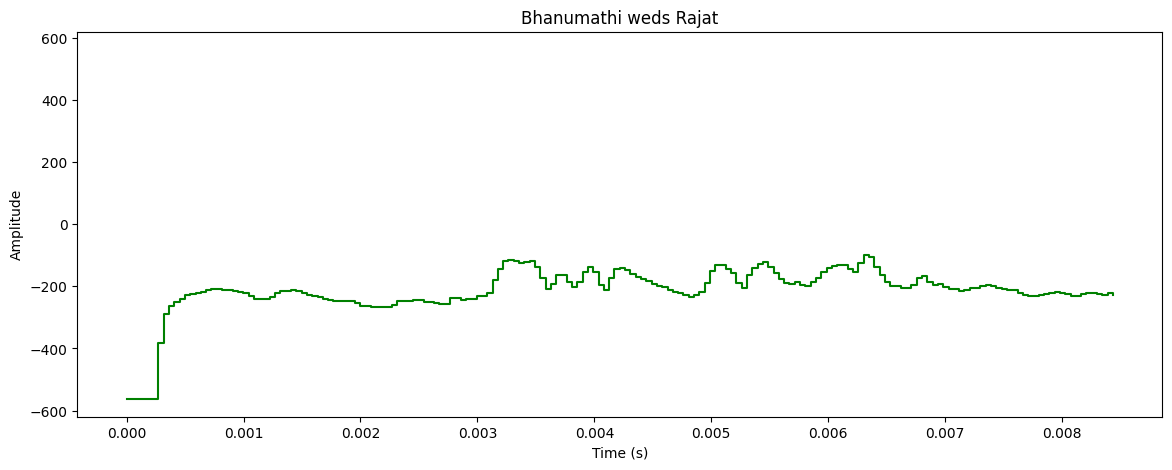

In [22]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Function to extract features (STFT, MFCC, LPC coefficients) from audio files
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature, sr

# Load data and extract features
bhanumathi_weds_rajat_features, sr1 = extract_features('BWR.wav')
bharat_features, sr2 = extract_features('Bharat.wav')

# Plot the signals
plt.figure(figsize=(14, 5))

# Plot Bhanumathi weds Rajat
librosa.display.waveshow(bhanumathi_weds_rajat_features, sr=sr1, color='g')
plt.title('Bhanumathi weds Rajat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


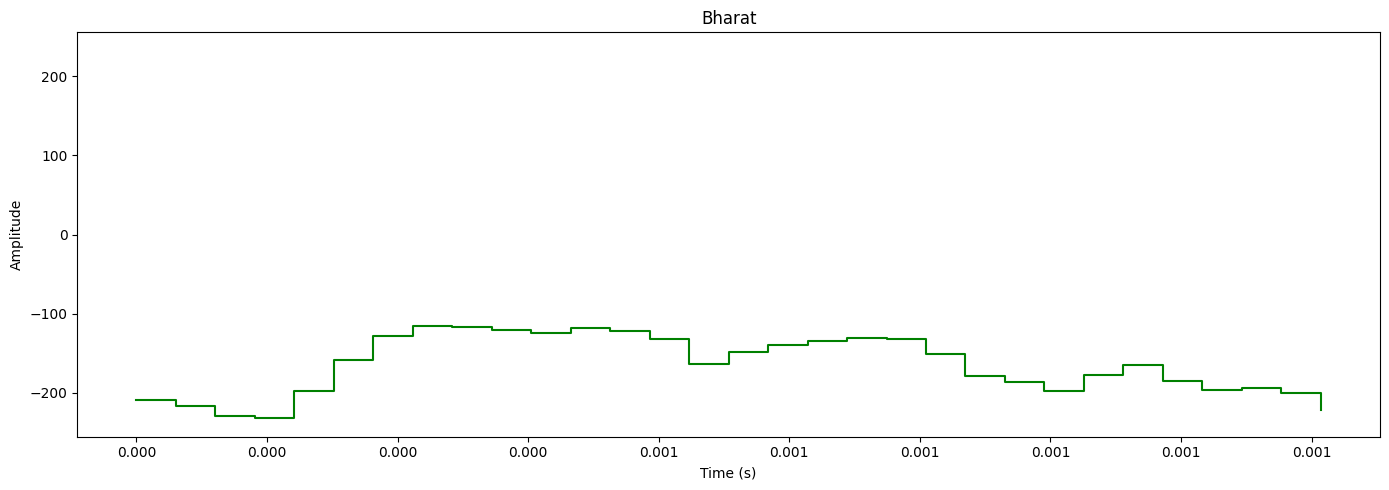

In [23]:
# Plot Bharat
plt.figure(figsize=(14, 5))
librosa.display.waveshow(bharat_features, sr=sr2, color='g')
plt.title('Bharat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()